In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [16]:
df = pd.read_csv('/content/twitter_training.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [10]:
df.isnull().sum()

,0
2401,0
Borderlands,0
Positive,0
"im getting on borderlands and i will murder you all ,",686


In [17]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

<ipython-input-19-3362c0979f78>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Positive', data = df, palette = 'coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-

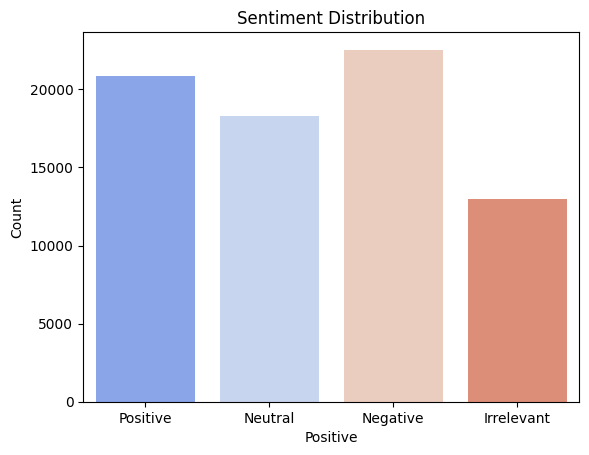

In [19]:
sns.countplot(x = 'Positive', data = df, palette = 'coolwarm')
plt.xlabel("Positive")
plt.ylabel("Count")
plt.title("Sentiment Distribution");

In [20]:
entity_sentiment = df.groupby(['Borderlands', 'Positive']).size().unstack(fill_value = 0)

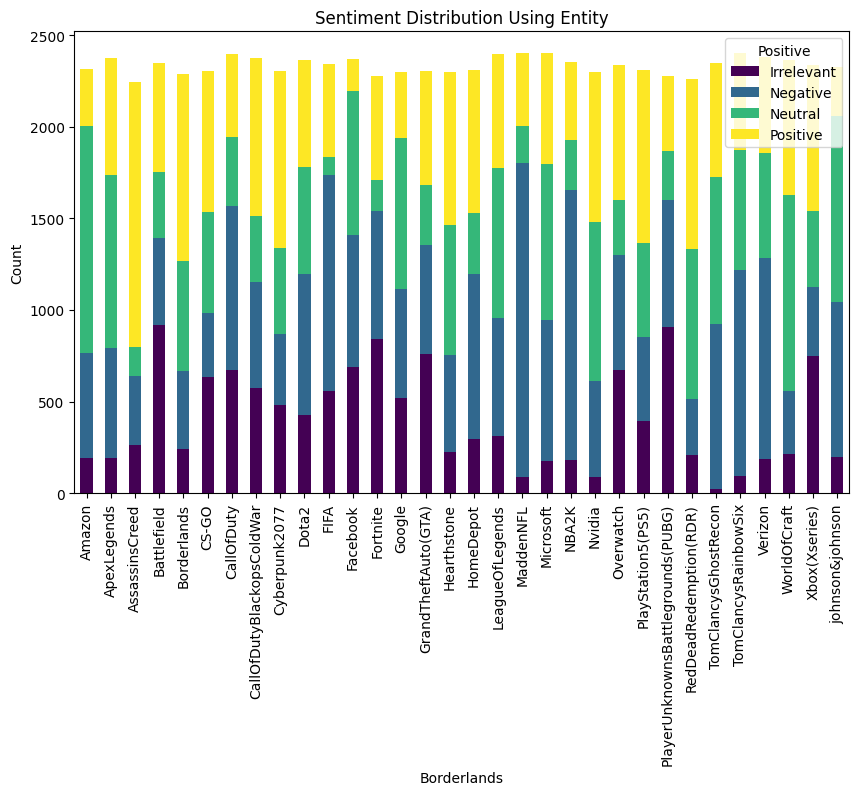

In [27]:
entity_sentiment.plot(kind = 'bar', stacked = 'True', figsize = (10,6), colormap = 'viridis')
plt.xlabel("Borderlands")
plt.ylabel("Count")
plt.title("Sentiment Distribution Using Entity");

In [30]:
positive_text = ' '.join(df[df['Positive'] == 'Positive']['Borderlands'])
wordcloud_positive = WordCloud(width = 800, height = 400, background_color = 'white').generate(positive_text)

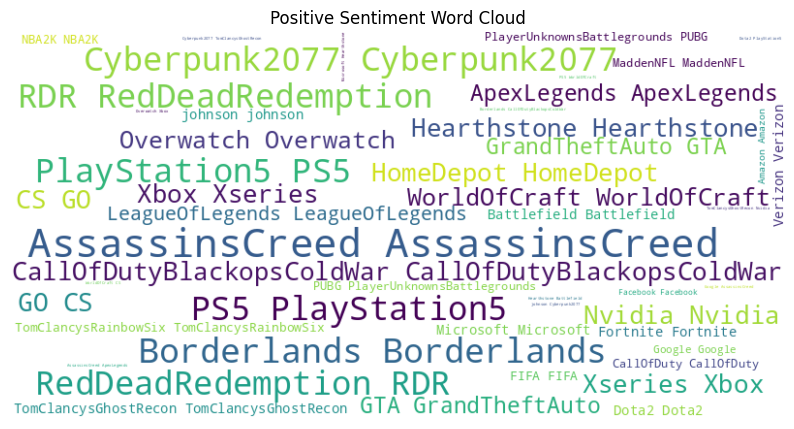

In [33]:
plt.figure(figsize = (10,6))
plt.imshow(wordcloud_positive, interpolation = 'bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')
plt.show();

In [36]:
negative_text = ' '.join(df[df['Positive'] == 'Negative']['Borderlands'])
wordcloud_negative = WordCloud(width = 800, height = 400, background_color = 'white').generate(negative_text)

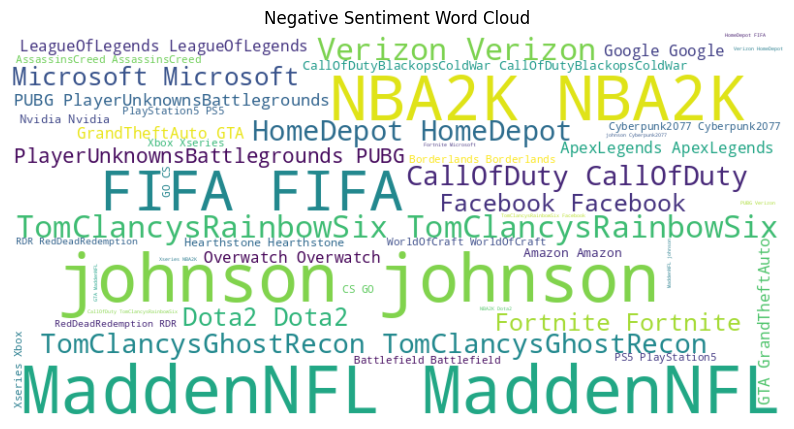

In [37]:
plt.figure(figsize = (10,6))
plt.imshow(wordcloud_negative, interpolation = 'bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')
plt.show();